In [1]:
import numpy as np
import os
from os.path import expanduser
home_dir = expanduser("~")
module_path = home_dir + '/modules/'
import sys
sys.path.append(module_path)
import pandas as pd
import math
import matplotlib.pyplot as plt
import time, datetime
import corner
np.random.seed(999)

In [2]:
galfile = pd.read_hdf('/home/magnus/code/non_network_notebooks/test_galcat_w_log_densities_3e5.h5')
galaxies = galfile.as_matrix()
gal_header = galfile.keys().tolist()
print(gal_header)

### Remove data points with halo mass below 10.5
print(np.shape(galaxies))
galaxies = galaxies[galaxies[:,6] > 10.5, :]
print(np.shape(galaxies))

['X_pos', 'Y_pos', 'Z_pos', 'X_vel', 'Y_vel', 'Z_vel', 'Halo_mass', 'Stellar_mass', 'SFR', 'Intra_cluster_mass', 'Halo_mass_peak', 'Stellar_mass_obs', 'SFR_obs', 'Halo_radius', 'Concentration', 'Halo_spin', 'Scale_peak_mass', 'Scale_half_mass', 'Scale_last_MajM', 'Type', 'Environmental_density']
(306925, 21)
(306925, 21)


In [3]:
data_dict = {'X_pos': 0, 'Y_pos': 1, 'Z_pos': 2, 'X_vel': 3, 'Y_vel': 4, 'Z_vel': 5, 'Halo_mass': 6, 
             'Stellar_mass': 7, 'SFR': 8, 'Intra_cluster_mass': 9, 'Halo_mass_peak': 10, 'Stellar_mass_obs': 11, 
             'SFR_obs': 12, 'Halo_radius': 13, 'Concentration': 14, 'Halo_spin': 15, 'Scale_peak_mass': 16, 
             'Scale_half_mass': 17, 'Scale_last_MajM': 18, 'Type': 19, 'Environmental_density': 20}

## Modify SFR

In [10]:
ssfr = galaxies[:, data_dict['SFR']] / np.power(10, galaxies[:, data_dict['Stellar_mass']])
print(len(ssfr[ssfr == 0]))
print(np.amax(ssfr))
print(np.amin(ssfr))

26258
6.600259069497821e-09
0.0


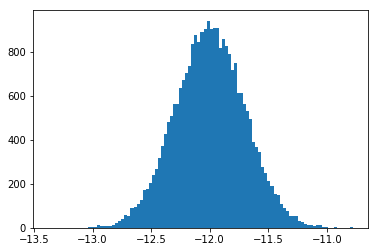

In [11]:
means = -12 * np.ones(np.count_nonzero(ssfr == 0))
dist = np.random.normal(means, .3)
plt.hist(dist, bins=100)
plt.show()

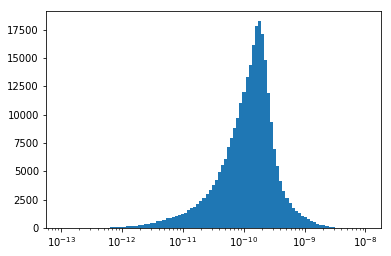

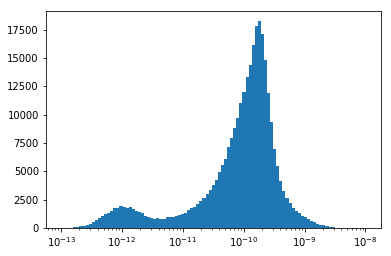

In [12]:
### Plot histogram over ssfr before and after the addition of the extra hump
bins = 10**np.linspace(-13, -8, 100)
plt.xscale('log')
plt.hist(ssfr[ssfr>0], bins=bins)
plt.show()

ssfr[ssfr == 0] = np.power(10, dist)

plt.xscale('log')
plt.hist(ssfr, bins=bins)
plt.show()

In [13]:
log_ssfr = np.log10(ssfr)
log_sfr = log_ssfr + galaxies[:, data_dict['Stellar_mass']]

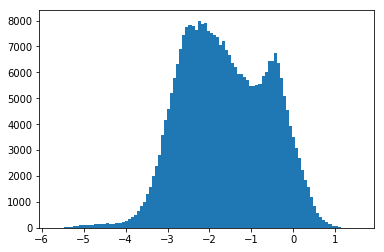

1.564863568631937
-5.6943908834043295


In [14]:
plt.hist(log_sfr, bins = 100)
plt.show()

print(np.amax(log_sfr))
print(np.amin(log_sfr))

<function matplotlib.pyplot.show>

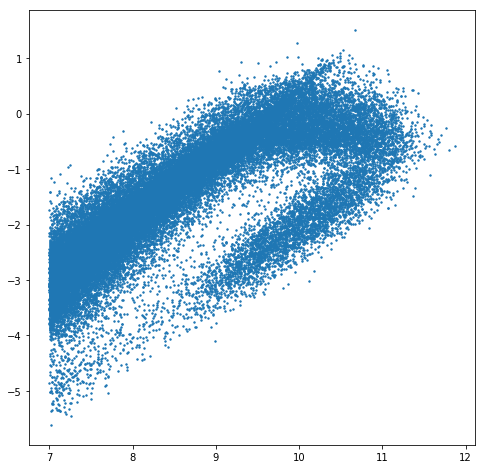

In [15]:
n_data_points = galaxies.shape[0]
subset_indices = np.random.choice(n_data_points, 50000, replace=False)

fig = plt.figure(figsize=(8,8))
plt.scatter(galaxies[subset_indices, data_dict['Stellar_mass']], log_sfr[subset_indices], s=2)
plt.show

[[ 9.99070072  0.18587329]
 [ 9.40530777 -0.01357358]
 [ 9.82718182 -1.95990966]
 ...
 [ 7.20132351 -2.15895039]
 [ 7.23220491 -2.61647989]
 [ 7.02956533 -3.50023726]]


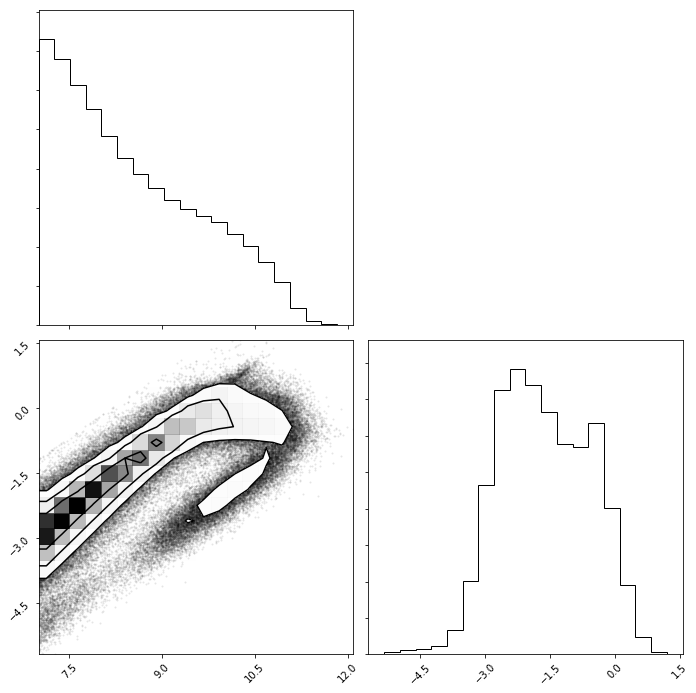

In [21]:
log_sfr_test = np.expand_dims(log_sfr, axis=1)
stellar_masses_test = np.expand_dims(galaxies[:, data_dict['Stellar_mass']], axis=1)
#print(log_sfr)
#print(log_sfr_test)
#print(galaxies[:, data_dict['Stellar_mass']])
#print(stellar_masses_test)

data = np.hstack((stellar_masses_test, log_sfr_test))
print(data)


figure = corner.corner(data)
figure.set_size_inches(12, 12)
plt.show()

## Make a new pd dataset and save it

In [22]:
pd_dataframe = pd.DataFrame(data=galaxies, columns=gal_header)
pd_dataframe['SFR'] = log_sfr

In [23]:
pd_dataframe.to_hdf('test_galcat_w_log_densities_and_log_sfr_3e5.h5', 'w')

## Try loading the newly created galaxy catalogue

In [24]:
galfile = pd.read_hdf('test_galcat_w_log_densities_and_log_sfr_3e5.h5')
galaxies = galfile.as_matrix()
gal_header = galfile.keys().tolist()
print(gal_header)
print(np.shape(galaxies))

['X_pos', 'Y_pos', 'Z_pos', 'X_vel', 'Y_vel', 'Z_vel', 'Halo_mass', 'Stellar_mass', 'SFR', 'Intra_cluster_mass', 'Halo_mass_peak', 'Stellar_mass_obs', 'SFR_obs', 'Halo_radius', 'Concentration', 'Halo_spin', 'Scale_peak_mass', 'Scale_half_mass', 'Scale_last_MajM', 'Type', 'Environmental_density']
(306925, 21)


In [25]:
print('%.2f' % (np.mean(galaxies[:,8])))
print('%.2f' % (np.amax(galaxies[:,8])))
print('%.2f' % (np.amin(galaxies[:,8])))
#print(np.sum(galaxies[:,6]) / 200**3)

-1.62
1.56
-5.69
